# Exploration

In [164]:
print("test")

test


In [165]:
import pandas as pd
from LabData.DataLoaders.GutMBLoader import GutMBLoader
from LabData.DataLoaders.SubjectLoader import SubjectLoader
from LabData.DataLoaders.DietLoggingLoader import DietLoggingLoader
from LabData.DataLoaders.LifeStyleLoader import LifeStyleLoader
from LabData.DataLoaders.BodyMeasuresLoader import BodyMeasuresLoader
from LabData.DataAnalyses.TenK_Trajectories.utils import get_diet_logging_around_stage
import numpy as np
import os
import pickle

In [166]:
stage = '04_00_visit' # 'baseline' or '02_00_visit' or '04_00_visit'
species = 'mpa_species' # 'segal_species' or 'mpa_species'
project = 'diet' # 'diet' or 'david'
CLR_flag = False
min_col_present_frac = 0.05

In [167]:
stage_suf = stage.replace('_00', '') if stage.endswith('_00_visit') else stage
CLR_suf = '_CLR' if CLR_flag else ''

In [168]:
if project == 'diet':
    path = '/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/'
elif project == 'david':
    path = '/net/mraid20/export/genie/LabData/Analyses/tomerse/david_colab/'

In [169]:
def explore_columns(df):
    for column in df.columns:
        print(column)
        print(df[column].value_counts())

## study_ids = [10, 1001, 1002]
study_ids = [10]
subjects_dl = SubjectLoader()
subjects_data = subjects_dl.get_data(groupby_reg='first', study_ids=study_ids)
subjects_df = subjects_data.df
print(subjects_df)

                                             StudyTypeID         city country  \
RegistrationCode Date                                                           
10K_1000028368   2020-03-22 08:26:05.077073         10.0         None      IL   
10K_1000273395   2020-03-05 20:53:54.399388         10.0         None      IL   
10K_1000633050   2021-06-21 14:23:50.372010         10.0         None      IL   
10K_1000942861   2021-06-11 11:30:37.386358         10.0       רחובות      IL   
10K_1001106466   2024-12-15 15:42:22.632981         10.0         None      IL   
...                                                  ...          ...     ...   
10K_9999226141   2019-12-04 07:07:07.815688         10.0      בני ראם      IL   
10K_9999409119   2020-02-22 15:19:08.365584         10.0  תל אביב-יפו      IL   
10K_9999623844   2023-02-19 01:46:16.838996         10.0         None      IL   
10K_9999732920   2022-12-23 22:20:48.083986         10.0         None      IL   
10K_9999767769   2020-01-31 

## Load Diet Data

In [170]:
if stage == 'baseline':
    diet_mb = pd.read_pickle(path + "diet_features.pkl")
elif stage != 'baseline':
    diet_mb = pd.read_pickle(path + f"diet_features_{stage_suf}.pkl")
diet_mb

,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Apple,Apple Cake,Apple Vinegar,...,Spicesandherbs,Vegetables,bakedgoods,fruitjuicesandsoftdrinks,milkcreamcheeseandyogurts,sweetmilkproducts,sweets,age,sex,Energy / BMR
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1007599726,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.035722,0.000000,0.0,...,0.000000,0.048608,0.000000,0.000000,0.246287,0.000000,0.060779,59.0,0.0,0.826334
10K_1012020971,0.0,0.000088,0.000000,0.000000,0.0,0.023122,0.0,0.024036,0.000000,0.0,...,0.000729,0.076266,0.000000,0.024077,0.023807,0.000000,0.161301,45.0,1.0,1.026829
10K_1012289523,0.0,0.000000,0.000000,0.000000,0.0,0.006709,0.0,0.000000,0.015792,0.0,...,0.000000,0.040859,0.010088,0.000000,0.000328,0.007847,0.210994,46.0,0.0,1.194266
10K_1019625838,0.0,0.000000,0.012959,0.000000,0.0,0.007690,0.0,0.018024,0.010247,0.0,...,0.000000,0.037782,0.000000,0.000000,0.194352,0.000000,0.328973,73.0,1.0,0.803358
10K_1021660035,0.0,0.000000,0.000000,0.009737,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.001927,0.180243,0.000000,0.000000,0.056925,0.000000,0.188728,51.0,1.0,0.833732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9966025874,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.007365,0.000000,0.0,...,0.000000,0.026465,0.000000,0.006910,0.024065,0.000000,0.268801,51.0,0.0,1.032016
10K_9972023164,0.0,0.000000,0.000000,0.000000,0.0,0.014433,0.0,0.000000,0.006780,0.0,...,0.000000,0.084617,0.000000,0.000000,0.000000,0.000000,0.129270,52.0,1.0,1.298955
10K_9974013758,0.0,0.000000,0.000000,0.000000,0.0,0.063831,0.0,0.055662,0.000000,0.0,...,0.001470,0.028928,0.000000,0.000690,0.181710,0.000000,0.002973,59.0,0.0,0.716509


In [171]:
# corr_matrix = diet_mb.corr()

In [172]:
# high_corr_pairs = corr_matrix[(np.abs(corr_matrix) > 0.6) & (corr_matrix != 1.0)]

# # Step 3: Unstack and filter to get pairs of features with high correlation
# high_corr_pairs = high_corr_pairs.unstack().dropna()

# # Since the matrix is symmetric, we need to filter out duplicates
# high_corr_pairs = high_corr_pairs[high_corr_pairs.index.get_level_values(0) < high_corr_pairs.index.get_level_values(1)]

# # Display the high correlation pairs
# pd.set_option('display.max_rows', None)
# high_corr_pairs

In [173]:
pd.reset_option('display.max_rows')

In [174]:
with open(path + 'my_lists_diet.pkl', 'rb') as file:
    loaded_lists = pickle.load(file)
base_features, all_diet_features = loaded_lists
all_diet_features

['Acorn squash',
 'Alfalfa sprouts',
 'Almond Beverage',
 'Almond flour',
 'Almond spread',
 'Almonds',
 'Amba',
 'Apple',
 'Apple Cake',
 'Apple Vinegar',
 'Apple juice',
 'Apricot',
 'Apropo',
 'Artichoke',
 'Arugula',
 'Asparagus',
 'Avocado',
 'Avocado Sandwich',
 'Bagel',
 'Baguette',
 'Baked apple',
 'Baklava',
 'Balsamic vinegar',
 'Bamba',
 'Banana',
 'Banana Cake',
 'Barbecue sauce',
 'Barley soup',
 'Basil',
 'Bean Noodles',
 'Bean soup',
 'Beans',
 'Beans black-eyed peas',
 'Beef',
 'Beef Cholent',
 'Beef Lasagna',
 'Beef Shawarma',
 'Beer',
 'Beet',
 'Beet Salad',
 'Berries',
 'Biscuit',
 'Bissli',
 'Black beans',
 'Blintzes',
 'Blue Cheese',
 'Blueberries',
 'Boiled corn',
 'Bolognese',
 'Bounty',
 'Brazil nuts',
 'Bread',
 'Bread Crumbs',
 'Brioche',
 'Broccoli',
 'Broth',
 'Brown Rice',
 'Brown Sugar',
 'Brownies',
 'Buckwheat Bread',
 'Buckwheat crackers',
 'Bulgur',
 'Burekas',
 'Butter',
 'Butter Cookies',
 'Caesar Salad',
 'Cake',
 'Calamari',
 'Camembert or Brie',
 

## Load Microbiome Data

In [175]:
# gut_bacteria = GutMBLoader().get_data(df='segal_species', study_ids=study_ids, research_stage = 'dietline')
# gut_bacteria = GutMBLoader().get_data('segal_species', subjects_df=subjects_df, study_ids=study_ids, research_stage='baseline',
#                              groupby_reg='first', genotek_vals=[1], col_names_as_ids=True,
#                              min_col_present=0.1, min_col_val=1e-4, take_log=False)
if stage == 'baseline':
    gut_bacteria = GutMBLoader().get_data(species, subjects_df=subjects_df, study_ids=study_ids, research_stage=stage,
                                groupby_reg='first', genotek_vals=[1],
                                min_col_present_frac=min_col_present_frac, min_col_val=1e-4, take_log=True)
    gut_bacteria_df = gut_bacteria.df.dropna(axis=1, how='all')
elif stage != 'baseline':
    print("hi")
    gut_bacteria = GutMBLoader().get_data(species, subjects_df=subjects_df, study_ids=study_ids, research_stage=stage,
                                groupby_reg='first', genotek_vals=[1],
                                min_col_val=1e-4, take_log=True)
    gut_bacteria_df = gut_bacteria.df.dropna(axis=1, how='all')
    gut_bacteria_df.columns = gut_bacteria_df.columns.str.replace('s__', '')
    with open(path + f'{species}/my_lists.pkl', 'rb') as file:
            loaded_lists = pickle.load(file)
    base_features, all_diet_features, targets = loaded_lists
    gut_bacteria_df = gut_bacteria_df[targets]
    


gut_bacteria_df.head(3)

hi


,Acidaminococcus_intestini,Adlercreutzia_equolifaciens,Agathobaculum_butyriciproducens,Akkermansia_muciniphila,Alistipes_SGB2313,Alistipes_communis,Alistipes_dispar,Alistipes_finegoldii,Alistipes_ihumii,Alistipes_indistinctus,...,Sutterella_seckii,Sutterella_sp_AM11_39,Sutterella_wadsworthensis,Vescimonas_SGB15087,Vescimonas_coprocola,Vescimonas_fastidiosa,Victivallis_lenta,Victivallis_vadensis,Wujia_chipingensis,bacterium_210917_DFI_7_65
SampleName,,,,,,,,,,,,,,,,,,,,,
22220180200863_v2_fullrun,-4.0,-4.0,-2.769551,-2.481486,-4.0,-3.698970,-4.0,-3.69897,-2.494850,-3.221849,...,-4.0,-4.0,-4.000000,-4.0,-3.698970,-4.000000,-2.408935,-4.0,-2.638272,-4.0
22220180200889_v2_fullrun,-4.0,-4.0,-2.744727,-2.537602,-4.0,-2.130768,-4.0,-4.00000,-2.180456,-4.000000,...,-4.0,-4.0,-2.823909,-4.0,-2.200659,-2.267606,-4.000000,-4.0,-2.275724,-4.0
22220180200890_v2_fullrun,-4.0,-4.0,-2.853872,-4.000000,-4.0,-3.154902,-4.0,-2.21467,-2.420216,-2.958607,...,-4.0,-4.0,-2.318759,-4.0,-3.698970,-4.000000,-3.221849,-4.0,-1.752027,-4.0


In [176]:
gut_bacteria_df.shape

(1466, 536)

In [177]:
gut_bacteria_df_meta = gut_bacteria.df_metadata
print(gut_bacteria_df_meta.head())
# Check that there's only one mb test per person
gut_bacteria_df_meta.RegistrationCode.value_counts()

                          RegistrationCode GenesetMapCount  HGMappedRC  \
SampleName                                                               
22220180200863_v2_fullrun   10K_9322750253            None    116644.0   
22220180200889_v2_fullrun   10K_4609970397            None     62819.0   
22220180200890_v2_fullrun   10K_7913251645            None      3102.0   
22220180200900_v2_fullrun   10K_9896598760            None      6681.0   
22220180200912_v2_fullrun   10K_4972103700            None     10217.0   

                          MPAMapCount Nextera     PE  PostBBDRC   PostHGFRC  \
SampleName                                                                    
22220180200863_v2_fullrun        None    None  False        NaN  11330926.0   
22220180200889_v2_fullrun        None    None  False        NaN   7403704.0   
22220180200890_v2_fullrun        None    None  False        NaN   9510412.0   
22220180200900_v2_fullrun        None    None  False        NaN   8370525.0   
2222018

10K_9322750253    1
10K_8353258684    1
10K_9369642485    1
10K_9047012747    1
10K_2561107919    1
                 ..
10K_4257751141    1
10K_8772587120    1
10K_5151579983    1
10K_2584947656    1
10K_8588872270    1
Name: RegistrationCode, Length: 1466, dtype: int64

In [178]:
gut_bacteria_df = gut_bacteria_df.join(gut_bacteria_df_meta['RegistrationCode'])
gut_bacteria_df

,Acidaminococcus_intestini,Adlercreutzia_equolifaciens,Agathobaculum_butyriciproducens,Akkermansia_muciniphila,Alistipes_SGB2313,Alistipes_communis,Alistipes_dispar,Alistipes_finegoldii,Alistipes_ihumii,Alistipes_indistinctus,...,Sutterella_sp_AM11_39,Sutterella_wadsworthensis,Vescimonas_SGB15087,Vescimonas_coprocola,Vescimonas_fastidiosa,Victivallis_lenta,Victivallis_vadensis,Wujia_chipingensis,bacterium_210917_DFI_7_65,RegistrationCode
SampleName,,,,,,,,,,,,,,,,,,,,,
22220180200863_v2_fullrun,-4.0,-4.000000,-2.769551,-2.481486,-4.0,-3.698970,-4.000000,-3.698970,-2.494850,-3.221849,...,-4.000000,-4.000000,-4.0,-3.698970,-4.000000,-2.408935,-4.000000,-2.638272,-4.0,10K_9322750253
22220180200889_v2_fullrun,-4.0,-4.000000,-2.744727,-2.537602,-4.0,-2.130768,-4.000000,-4.000000,-2.180456,-4.000000,...,-4.000000,-2.823909,-4.0,-2.200659,-2.267606,-4.000000,-4.000000,-2.275724,-4.0,10K_4609970397
22220180200890_v2_fullrun,-4.0,-4.000000,-2.853872,-4.000000,-4.0,-3.154902,-4.000000,-2.214670,-2.420216,-2.958607,...,-4.000000,-2.318759,-4.0,-3.698970,-4.000000,-3.221849,-4.000000,-1.752027,-4.0,10K_7913251645
22220180200900_v2_fullrun,-4.0,-4.000000,-2.552842,-2.318759,-4.0,-2.769551,-3.698970,-3.000000,-3.301030,-4.000000,...,-4.000000,-2.346787,-4.0,-4.000000,-4.000000,-4.000000,-2.638272,-1.801343,-4.0,10K_9896598760
22220180200912_v2_fullrun,-4.0,-4.000000,-3.698970,-4.000000,-4.0,-2.958607,-4.000000,-3.221849,-4.000000,-4.000000,...,-4.000000,-4.000000,-4.0,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.0,10K_4972103700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22240180104711_v2_fullrun,-4.0,-3.096910,-2.721246,-2.522879,-4.0,-2.721246,-4.000000,-2.920819,-3.045757,-4.000000,...,-4.000000,-4.000000,-4.0,-4.000000,-4.000000,-4.000000,-2.619789,-2.494850,-4.0,10K_4183800148
22240180104713_v2_fullrun,-4.0,-4.000000,-2.769551,-4.000000,-4.0,-2.420216,-2.619789,-4.000000,-4.000000,-4.000000,...,-4.000000,-4.000000,-4.0,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.0,10K_2884519253
22240180104766_v2_fullrun,-4.0,-2.481486,-3.221849,-2.853872,-4.0,-1.619789,-2.853872,-2.886057,-2.301030,-4.000000,...,-4.000000,-4.000000,-4.0,-4.000000,-4.000000,-3.397940,-2.886057,-4.000000,-4.0,10K_3709515377


In [179]:
gut_bacteria_df = gut_bacteria_df.set_index(['RegistrationCode'])
gut_bacteria_df

,Acidaminococcus_intestini,Adlercreutzia_equolifaciens,Agathobaculum_butyriciproducens,Akkermansia_muciniphila,Alistipes_SGB2313,Alistipes_communis,Alistipes_dispar,Alistipes_finegoldii,Alistipes_ihumii,Alistipes_indistinctus,...,Sutterella_seckii,Sutterella_sp_AM11_39,Sutterella_wadsworthensis,Vescimonas_SGB15087,Vescimonas_coprocola,Vescimonas_fastidiosa,Victivallis_lenta,Victivallis_vadensis,Wujia_chipingensis,bacterium_210917_DFI_7_65
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_9322750253,-4.0,-4.000000,-2.769551,-2.481486,-4.0,-3.698970,-4.000000,-3.698970,-2.494850,-3.221849,...,-4.0,-4.000000,-4.000000,-4.0,-3.698970,-4.000000,-2.408935,-4.000000,-2.638272,-4.0
10K_4609970397,-4.0,-4.000000,-2.744727,-2.537602,-4.0,-2.130768,-4.000000,-4.000000,-2.180456,-4.000000,...,-4.0,-4.000000,-2.823909,-4.0,-2.200659,-2.267606,-4.000000,-4.000000,-2.275724,-4.0
10K_7913251645,-4.0,-4.000000,-2.853872,-4.000000,-4.0,-3.154902,-4.000000,-2.214670,-2.420216,-2.958607,...,-4.0,-4.000000,-2.318759,-4.0,-3.698970,-4.000000,-3.221849,-4.000000,-1.752027,-4.0
10K_9896598760,-4.0,-4.000000,-2.552842,-2.318759,-4.0,-2.769551,-3.698970,-3.000000,-3.301030,-4.000000,...,-4.0,-4.000000,-2.346787,-4.0,-4.000000,-4.000000,-4.000000,-2.638272,-1.801343,-4.0
10K_4972103700,-4.0,-4.000000,-3.698970,-4.000000,-4.0,-2.958607,-4.000000,-3.221849,-4.000000,-4.000000,...,-4.0,-4.000000,-4.000000,-4.0,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_4183800148,-4.0,-3.096910,-2.721246,-2.522879,-4.0,-2.721246,-4.000000,-2.920819,-3.045757,-4.000000,...,-4.0,-4.000000,-4.000000,-4.0,-4.000000,-4.000000,-4.000000,-2.619789,-2.494850,-4.0
10K_2884519253,-4.0,-4.000000,-2.769551,-4.000000,-4.0,-2.420216,-2.619789,-4.000000,-4.000000,-4.000000,...,-4.0,-4.000000,-4.000000,-4.0,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.0
10K_3709515377,-4.0,-2.481486,-3.221849,-2.853872,-4.0,-1.619789,-2.853872,-2.886057,-2.301030,-4.000000,...,-4.0,-4.000000,-4.000000,-4.0,-4.000000,-4.000000,-3.397940,-2.886057,-4.000000,-4.0


In [180]:
common_index = gut_bacteria_df.index.intersection(diet_mb.index)
gut_bacteria_df = gut_bacteria_df.loc[common_index]
gut_bacteria_df

,Acidaminococcus_intestini,Adlercreutzia_equolifaciens,Agathobaculum_butyriciproducens,Akkermansia_muciniphila,Alistipes_SGB2313,Alistipes_communis,Alistipes_dispar,Alistipes_finegoldii,Alistipes_ihumii,Alistipes_indistinctus,...,Sutterella_seckii,Sutterella_sp_AM11_39,Sutterella_wadsworthensis,Vescimonas_SGB15087,Vescimonas_coprocola,Vescimonas_fastidiosa,Victivallis_lenta,Victivallis_vadensis,Wujia_chipingensis,bacterium_210917_DFI_7_65
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_9322750253,-4.0,-4.000000,-2.769551,-2.481486,-4.0,-3.698970,-4.000000,-3.698970,-2.494850,-3.221849,...,-4.0,-4.000000,-4.000000,-4.0,-3.698970,-4.000000,-2.408935,-4.000000,-2.638272,-4.0
10K_4609970397,-4.0,-4.000000,-2.744727,-2.537602,-4.0,-2.130768,-4.000000,-4.000000,-2.180456,-4.000000,...,-4.0,-4.000000,-2.823909,-4.0,-2.200659,-2.267606,-4.000000,-4.000000,-2.275724,-4.0
10K_7913251645,-4.0,-4.000000,-2.853872,-4.000000,-4.0,-3.154902,-4.000000,-2.214670,-2.420216,-2.958607,...,-4.0,-4.000000,-2.318759,-4.0,-3.698970,-4.000000,-3.221849,-4.000000,-1.752027,-4.0
10K_9896598760,-4.0,-4.000000,-2.552842,-2.318759,-4.0,-2.769551,-3.698970,-3.000000,-3.301030,-4.000000,...,-4.0,-4.000000,-2.346787,-4.0,-4.000000,-4.000000,-4.000000,-2.638272,-1.801343,-4.0
10K_2839251300,-4.0,-4.000000,-3.221849,-4.000000,-4.0,-2.337242,-2.744727,-4.000000,-2.886057,-4.000000,...,-4.0,-4.000000,-4.000000,-4.0,-4.000000,-4.000000,-4.000000,-4.000000,-1.785156,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_4183800148,-4.0,-3.096910,-2.721246,-2.522879,-4.0,-2.721246,-4.000000,-2.920819,-3.045757,-4.000000,...,-4.0,-4.000000,-4.000000,-4.0,-4.000000,-4.000000,-4.000000,-2.619789,-2.494850,-4.0
10K_2884519253,-4.0,-4.000000,-2.769551,-4.000000,-4.0,-2.420216,-2.619789,-4.000000,-4.000000,-4.000000,...,-4.0,-4.000000,-4.000000,-4.0,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.0
10K_3709515377,-4.0,-2.481486,-3.221849,-2.853872,-4.0,-1.619789,-2.853872,-2.886057,-2.301030,-4.000000,...,-4.0,-4.000000,-4.000000,-4.0,-4.000000,-4.000000,-3.397940,-2.886057,-4.000000,-4.0


In [181]:
if stage == 'baseline':
    mask = (gut_bacteria_df != -4).mean() >= min_col_present_frac
    gut_bacteria_df = gut_bacteria_df.loc[:, mask]
    gut_bacteria_df

In [182]:
# Normalize by row.

# Step 1: Convert to normal scale
gut_bacteria_df_normal = 10 ** gut_bacteria_df

# Step 2: Mask of values that are NOT 0.0001
mask = gut_bacteria_df_normal != 0.0001

# Step 3: Row-wise sum of the non-0.0001 values
non_floor_sum = gut_bacteria_df_normal.where(mask).sum(axis=1)

# Step 4: Normalize ONLY the non-0.0001 values, keep 0.0001 unchanged
gut_bacteria_df_normal = gut_bacteria_df_normal.where(~mask, gut_bacteria_df_normal.div(non_floor_sum, axis=0))

# Step 5: Convert back to log10
gut_bacteria_df_log = np.log10(gut_bacteria_df_normal)
gut_bacteria_df = gut_bacteria_df_log
gut_bacteria_df

,Acidaminococcus_intestini,Adlercreutzia_equolifaciens,Agathobaculum_butyriciproducens,Akkermansia_muciniphila,Alistipes_SGB2313,Alistipes_communis,Alistipes_dispar,Alistipes_finegoldii,Alistipes_ihumii,Alistipes_indistinctus,...,Sutterella_seckii,Sutterella_sp_AM11_39,Sutterella_wadsworthensis,Vescimonas_SGB15087,Vescimonas_coprocola,Vescimonas_fastidiosa,Victivallis_lenta,Victivallis_vadensis,Wujia_chipingensis,bacterium_210917_DFI_7_65
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_9322750253,-4.0,-4.000000,-2.701314,-2.413249,-4.0,-3.630733,-4.000000,-3.630733,-2.426613,-3.153612,...,-4.0,-4.000000,-4.000000,-4.0,-3.630733,-4.000000,-2.340698,-4.000000,-2.570035,-4.0
10K_4609970397,-4.0,-4.000000,-2.691818,-2.484692,-4.0,-2.077859,-4.000000,-4.000000,-2.127547,-4.000000,...,-4.0,-4.000000,-2.770999,-4.0,-2.147750,-2.214697,-4.000000,-4.000000,-2.222815,-4.0
10K_7913251645,-4.0,-4.000000,-2.833830,-4.000000,-4.0,-3.134860,-4.000000,-2.194628,-2.400174,-2.938565,...,-4.0,-4.000000,-2.298717,-4.0,-3.678928,-4.000000,-3.201807,-4.000000,-1.731985,-4.0
10K_9896598760,-4.0,-4.000000,-2.549660,-2.315577,-4.0,-2.766369,-3.695788,-2.996818,-3.297848,-4.000000,...,-4.0,-4.000000,-2.343606,-4.0,-4.000000,-4.000000,-4.000000,-2.635090,-1.798161,-4.0
10K_2839251300,-4.0,-4.000000,-3.216298,-4.000000,-4.0,-2.331691,-2.739177,-4.000000,-2.880506,-4.000000,...,-4.0,-4.000000,-4.000000,-4.0,-4.000000,-4.000000,-4.000000,-4.000000,-1.779605,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_4183800148,-4.0,-3.014573,-2.638909,-2.440542,-4.0,-2.638909,-4.000000,-2.838482,-2.963421,-4.000000,...,-4.0,-4.000000,-4.000000,-4.0,-4.000000,-4.000000,-4.000000,-2.537452,-2.412513,-4.0
10K_2884519253,-4.0,-4.000000,-2.753853,-4.000000,-4.0,-2.404519,-2.604091,-4.000000,-4.000000,-4.000000,...,-4.0,-4.000000,-4.000000,-4.0,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.0
10K_3709515377,-4.0,-2.474790,-3.215153,-2.847176,-4.0,-1.613093,-2.847176,-2.879361,-2.294334,-4.000000,...,-4.0,-4.000000,-4.000000,-4.0,-4.000000,-4.000000,-3.391244,-2.879361,-4.000000,-4.0


In [183]:
gut_bacteria_df.columns[gut_bacteria_df.columns.str.contains('Agatho', case=False)]

Index(['Agathobaculum_butyriciproducens'], dtype='object')

In [184]:
if species == 'segal_species':
    gut_bacteria_df_col = gut_bacteria.df_columns_metadata
    # View 5 most common bacteria
    gut_bacteria_df_col[gut_bacteria_df_col['Unnamed: 0'].isin(["Rep_485", "Rep_609", "Rep_477", "Rep_449", "Rep_231"])]

In [185]:
if species == 'segal_species':
    gut_bacteria_df_col.shape

In [186]:
# filtered_mb_names = gut_bacteria_df_col[gut_bacteria_df_col['species'].str.contains('lacto', case=False)]
# filtered_mb_names

In [187]:
if stage == 'baseline' and species == 'segal_species':
    gut_bacteria_df_col.to_pickle(path + "mb_names.pkl")

In [188]:
# How many taxa does the first person have?
first = gut_bacteria_df.iloc[0]
first = first[first > -4]
first

Agathobaculum_butyriciproducens   -2.701314
Akkermansia_muciniphila           -2.413249
Alistipes_communis                -3.630733
Alistipes_finegoldii              -3.630733
Alistipes_ihumii                  -2.426613
                                     ...   
Streptococcus_thermophilus        -3.232793
Sutterella_SGB9298                -3.232793
Vescimonas_coprocola              -3.630733
Victivallis_lenta                 -2.340698
Wujia_chipingensis                -2.570035
Name: 10K_9322750253, Length: 209, dtype: float64

In [189]:
# How many taxa each person has on average?
sum = 0
for index, row in gut_bacteria_df.iterrows():
    person = gut_bacteria_df.loc[index]
    person = person[person > -4]
    sum += len(person)
mean_taxa = sum / len(gut_bacteria_df)
mean_taxa

146.45848056537102

In [190]:
targets = list(gut_bacteria_df.columns)

### Alpha diversity targets

In [191]:
# Richness
def richness(row):
    filtered = row[row > -4]
    return len(filtered)

gut_bacteria_df['Richness'] = gut_bacteria_df.apply(richness, axis=1)
gut_bacteria_df

,Acidaminococcus_intestini,Adlercreutzia_equolifaciens,Agathobaculum_butyriciproducens,Akkermansia_muciniphila,Alistipes_SGB2313,Alistipes_communis,Alistipes_dispar,Alistipes_finegoldii,Alistipes_ihumii,Alistipes_indistinctus,...,Sutterella_sp_AM11_39,Sutterella_wadsworthensis,Vescimonas_SGB15087,Vescimonas_coprocola,Vescimonas_fastidiosa,Victivallis_lenta,Victivallis_vadensis,Wujia_chipingensis,bacterium_210917_DFI_7_65,Richness
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_9322750253,-4.0,-4.000000,-2.701314,-2.413249,-4.0,-3.630733,-4.000000,-3.630733,-2.426613,-3.153612,...,-4.000000,-4.000000,-4.0,-3.630733,-4.000000,-2.340698,-4.000000,-2.570035,-4.0,209
10K_4609970397,-4.0,-4.000000,-2.691818,-2.484692,-4.0,-2.077859,-4.000000,-4.000000,-2.127547,-4.000000,...,-4.000000,-2.770999,-4.0,-2.147750,-2.214697,-4.000000,-4.000000,-2.222815,-4.0,162
10K_7913251645,-4.0,-4.000000,-2.833830,-4.000000,-4.0,-3.134860,-4.000000,-2.194628,-2.400174,-2.938565,...,-4.000000,-2.298717,-4.0,-3.678928,-4.000000,-3.201807,-4.000000,-1.731985,-4.0,215
10K_9896598760,-4.0,-4.000000,-2.549660,-2.315577,-4.0,-2.766369,-3.695788,-2.996818,-3.297848,-4.000000,...,-4.000000,-2.343606,-4.0,-4.000000,-4.000000,-4.000000,-2.635090,-1.798161,-4.0,183
10K_2839251300,-4.0,-4.000000,-3.216298,-4.000000,-4.0,-2.331691,-2.739177,-4.000000,-2.880506,-4.000000,...,-4.000000,-4.000000,-4.0,-4.000000,-4.000000,-4.000000,-4.000000,-1.779605,-4.0,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_4183800148,-4.0,-3.014573,-2.638909,-2.440542,-4.0,-2.638909,-4.000000,-2.838482,-2.963421,-4.000000,...,-4.000000,-4.000000,-4.0,-4.000000,-4.000000,-4.000000,-2.537452,-2.412513,-4.0,195
10K_2884519253,-4.0,-4.000000,-2.753853,-4.000000,-4.0,-2.404519,-2.604091,-4.000000,-4.000000,-4.000000,...,-4.000000,-4.000000,-4.0,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.0,123
10K_3709515377,-4.0,-2.474790,-3.215153,-2.847176,-4.0,-1.613093,-2.847176,-2.879361,-2.294334,-4.000000,...,-4.000000,-4.000000,-4.0,-4.000000,-4.000000,-3.391244,-2.879361,-4.000000,-4.0,188


In [192]:
# Shannon Diversity
def shannon(row):
    filtered = row[row > -4]
    filtered = filtered.drop("Richness")
    
    rel_abundance = 10 ** filtered
    ln_rel_abundance = np.log(rel_abundance.replace(0, 1))
    product = rel_abundance * ln_rel_abundance
    ans = -1 * product.sum()
    return round(float(ans), 2)

gut_bacteria_df['Shannon_diversity'] = gut_bacteria_df.apply(shannon, axis=1)
gut_bacteria_df

,Acidaminococcus_intestini,Adlercreutzia_equolifaciens,Agathobaculum_butyriciproducens,Akkermansia_muciniphila,Alistipes_SGB2313,Alistipes_communis,Alistipes_dispar,Alistipes_finegoldii,Alistipes_ihumii,Alistipes_indistinctus,...,Sutterella_wadsworthensis,Vescimonas_SGB15087,Vescimonas_coprocola,Vescimonas_fastidiosa,Victivallis_lenta,Victivallis_vadensis,Wujia_chipingensis,bacterium_210917_DFI_7_65,Richness,Shannon_diversity
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_9322750253,-4.0,-4.000000,-2.701314,-2.413249,-4.0,-3.630733,-4.000000,-3.630733,-2.426613,-3.153612,...,-4.000000,-4.0,-3.630733,-4.000000,-2.340698,-4.000000,-2.570035,-4.0,209,4.22
10K_4609970397,-4.0,-4.000000,-2.691818,-2.484692,-4.0,-2.077859,-4.000000,-4.000000,-2.127547,-4.000000,...,-2.770999,-4.0,-2.147750,-2.214697,-4.000000,-4.000000,-2.222815,-4.0,162,3.90
10K_7913251645,-4.0,-4.000000,-2.833830,-4.000000,-4.0,-3.134860,-4.000000,-2.194628,-2.400174,-2.938565,...,-2.298717,-4.0,-3.678928,-4.000000,-3.201807,-4.000000,-1.731985,-4.0,215,4.07
10K_9896598760,-4.0,-4.000000,-2.549660,-2.315577,-4.0,-2.766369,-3.695788,-2.996818,-3.297848,-4.000000,...,-2.343606,-4.0,-4.000000,-4.000000,-4.000000,-2.635090,-1.798161,-4.0,183,3.77
10K_2839251300,-4.0,-4.000000,-3.216298,-4.000000,-4.0,-2.331691,-2.739177,-4.000000,-2.880506,-4.000000,...,-4.000000,-4.0,-4.000000,-4.000000,-4.000000,-4.000000,-1.779605,-4.0,134,3.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_4183800148,-4.0,-3.014573,-2.638909,-2.440542,-4.0,-2.638909,-4.000000,-2.838482,-2.963421,-4.000000,...,-4.000000,-4.0,-4.000000,-4.000000,-4.000000,-2.537452,-2.412513,-4.0,195,4.17
10K_2884519253,-4.0,-4.000000,-2.753853,-4.000000,-4.0,-2.404519,-2.604091,-4.000000,-4.000000,-4.000000,...,-4.000000,-4.0,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.0,123,3.53
10K_3709515377,-4.0,-2.474790,-3.215153,-2.847176,-4.0,-1.613093,-2.847176,-2.879361,-2.294334,-4.000000,...,-4.000000,-4.0,-4.000000,-4.000000,-3.391244,-2.879361,-4.000000,-4.0,188,4.07


In [193]:
gut_bacteria_df['Shannon_diversity'].describe()

count    1132.000000
mean        3.604452
std         0.630867
min         0.630000
25%         3.340000
50%         3.740000
75%         4.042500
max         4.620000
Name: Shannon_diversity, dtype: float64

In [194]:
diversity_targets = ['Richness', 'Shannon_diversity']

CLR Transformation

In [195]:
def clr_transform(row):
    return row - row.mean()

if CLR_flag:
    gut_bacteria_df[targets] = gut_bacteria_df[targets].apply(clr_transform, axis=1)

### Health Targets
HACK top 17

In [196]:
# import pandas as pd

# # Assume you already have a DataFrame `abundance_df`
# # Rows = samples, Columns = species (as strings, e.g. 'Faecalibacterium prausnitzii')
# # Values = relative abundances (e.g., fractions summing to 1)

# if species == 'segal_species':
# # Step 1: Define the HACK-top-17 species
#     hack_top_17 = [
#         'Faecalibacterium prausnitzii',
#         'Bacteroides uniformis',
#         'Lachnospira eligens_a', # Synonymous with'Eubacterium eligens',
#         'Roseburia hominis',
#         'Roseburia inulinivorans',
#         'Agathobacter rectalis',#'Eubacterium rectale',
#         'Alistipes putredinis',
#         'Alistipes shahii',
#         'Coprococcus_a catus',
#         'Coprococcus_a catus_a',
#         'Odoribacter splanchnicus',
#         'Agathobaculum butyriciproducens',
#         'Fusicatenibacter saccharivorans',
#         'Roseburia intestinalis',
#         'Alistipes finegoldii',
#         #'Oscillibacter sp. 57_20', - not in the data
#         'Anaerobutyricum hallii',
#         'Adlercreutzia equolifaciens'
#     ]

#     # Normalize both to lowercase
#     species_col_lower = gut_bacteria_df_col['species_new'].str.lower()
#     hack_17_lower = [s.lower() for s in hack_top_17]

#     # Check for exact matches
#     mask = species_col_lower.isin(hack_17_lower)
#     hack_top_17_index = gut_bacteria_df_col[mask].index

#     print(hack_top_17_index)


#     # Step 2: Make sure all species are present in the columns
#     present_species = [s for s in hack_top_17_index if s in gut_bacteria_df.columns]
#     print(gut_bacteria_df.columns)
#     print(present_species)

#     # Step 3: Compute rank for each sample (higher rank = more abundant, ties handled by average)
#     ranked_df = gut_bacteria_df.rank(axis=1, method='average', ascending=False)

#     # Step 4: Compute mean rank of the HACK-top-17 species
#     gut_bacteria_df['modified_HACK_top17_score'] = ranked_df[present_species].mean(axis=1)
#     gut_bacteria_df['modified_HACK_top17_score'].hist()

In [197]:
# gut_bacteria_df.columns

Matched HACK-top-17 MetaPhlAn species in data:
[]


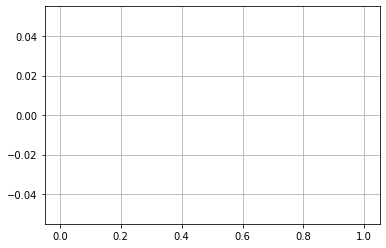

In [198]:
if species == 'mpa_species':
    # Step 1: Define the HACK-top-17 species (MetaPhlAn format: 's__Genus_species')
    hack_top_17_metaphlan = [
        's__Faecalibacterium_prausnitzii',
        's__Bacteroides_uniformis',
        's__Lachnospira_eligens', # Synonymous with'Eubacterium eligens'
        's__Roseburia_hominis',
        's__Roseburia_inulinivorans',
        's__Eubacterium_rectale',#'Eubacterium rectale',
        's__Alistipes_putredinis',
        's__Alistipes_shahii',
        's__Coprococcus_catus',
        's__Odoribacter_splanchnicus',
        's__Agathobaculum_butyriciproducens',
        's__Fusicatenibacter_saccharivorans',
        's__Roseburia_intestinalis',
        's__Alistipes_finegoldii',
        # 's__Oscillibacter_sp._57_20', - not in the data
        's__Anaerobutyricum_hallii', #'Anaerobutyricum hallii',
        's__Adlercreutzia_equolifaciens'
    ]

    # Step 2: Lowercase comparison
    df_species_lower = [col.lower() for col in gut_bacteria_df.columns]
    hack_top_17_lower = [s.lower() for s in hack_top_17_metaphlan]

    # Step 3: Find matched species
    present_species = [
        col for col in gut_bacteria_df.columns
        if col.lower() in hack_top_17_lower
    ]

    print("Matched HACK-top-17 MetaPhlAn species in data:")
    print(present_species)

    # Step 4: Compute rank (higher rank = higher abundance)
    ranked_df = gut_bacteria_df.rank(axis=1, method='average', ascending=False)

    # Step 5: Compute mean rank of the present HACK-top-17 species
    gut_bacteria_df['modified_HACK_top17_score'] = ranked_df[present_species].mean(axis=1)

    # Optional: visualize distribution
    gut_bacteria_df['modified_HACK_top17_score'].hist()

In [199]:
# # # Find missing species from HACK-top-17

# # # Normalize both sets to lowercase for comparison
# # available_species = gut_bacteria_df_col['species_new'].str.lower().unique()
# # hack_17_lower = [s.lower() for s in hack_top_17]

# # # Find missing species
# # missing_species = [s for s in hack_17_lower if s not in available_species]

# # # Show missing species with original casing
# # missing_original = [s for s in hack_top_17 if s.lower() in missing_species]
# # print("Missing species (not matched exactly):")
# # for s in missing_original:
# #     print("-", s)

# from difflib import get_close_matches

# # print("\nSuggested close matches:")
# # for target in missing_species:
# #     close = get_close_matches(target, available_species, n=3, cutoff=0.6)
# #     print(f"{target}: {close}")

# if species == 'mpa_species':
#     # Define HACK-top-17 species (MetaPhlAn format)    

#     # Normalize both sets to lowercase for comparison
#     available_species = [s.lower() for s in gut_bacteria_df.columns]
#     hack_17_lower = [s.lower() for s in hack_top_17_metaphlan]

#     # Find missing species
#     missing_species = [s for s in hack_17_lower if s not in available_species]

#     # Show missing species with original casing
#     missing_original = [s for s in hack_top_17_metaphlan if s.lower() in missing_species]

#     print("Missing species (not matched exactly):")
#     for s in missing_original:
#         print("-", s)

#     # Suggested close matches using fuzzy string comparison
#     print("\nSuggested close matches:")
#     for target in missing_species:
#         close = get_close_matches(target, available_species, n=3, cutoff=0.6)
#         print(f"{target}: {close}")

GMWI2

In [200]:
# if species == 'mpa_species':
#     GMWI2_coefficients = pd.read_csv(path + "GMWI2_coefficients.csv")
#     GMWI2_coefficients['species'] = GMWI2_coefficients['taxon'].str.split('s__').str[1]
#     GMWI2_coefficients['species'].fillna("Unknown", inplace=True)
#     GMWI2_coefficients['species'] = "s__" + GMWI2_coefficients['species']
#     GMWI2_coefficients

In [201]:
# if species == 'mpa_species':
#     # Binarize gut_bacteria_df and apply
#     gut_bacteria_df_bin = (gut_bacteria_df > -4).astype(int)
#     gut_bacteria_df_bin

In [202]:
# if species == 'mpa_species':   
#     # Create the theta dictionary from the DataFrame
#     theta = dict(zip(GMWI2_coefficients['species'], GMWI2_coefficients['coefficient']))

#     # Step 2: Align columns with available theta taxa
#     common_taxa = [taxon for taxon in theta if taxon in gut_bacteria_df_bin.columns]
#     theta_vector = pd.Series(theta)[common_taxa]
#     X_common = gut_bacteria_df_bin[common_taxa]

#     # Step 3: Compute GMWI2 score as dot product (θ^T x)
#     gmwi2_scores = X_common.dot(theta_vector)

#     # Step 4: Add to your dataframe
#     gut_bacteria_df['GMWI2_score'] = gmwi2_scores
#     gut_bacteria_df['GMWI2_score'].hist()

## Metabolic Pathways

In [203]:
mb_pathways_df_all = pd.read_parquet('/net/mraid20/export/mb/MBPipeline/Analyses/HUMAnN/joined_pathways/pathways_all__aggregated.parquet')
mb_pathways_df_all = mb_pathways_df_all.T
mb_pathways_df_all

# Pathway,"12DICHLORETHDEG-PWY: 1,2-dichloroethane degradation","14DICHLORBENZDEG-PWY: 1,4-dichlorobenzene degradation",1CMET2-PWY: folate transformations III (E. coli),3-HYDROXYPHENYLACETATE-DEGRADATION-PWY: 4-hydroxyphenylacetate degradation,AEROBACTINSYN-PWY: aerobactin biosynthesis,ALLANTOINDEG-PWY: superpathway of allantoin degradation in yeast,ANAEROFRUCAT-PWY: homolactic fermentation,ANAGLYCOLYSIS-PWY: glycolysis III (from glucose),ARG+POLYAMINE-SYN: superpathway of arginine and polyamine biosynthesis,"ARGDEG-PWY: superpathway of L-arginine, putrescine, and 4-aminobutanoate degradation",...,THREOCAT-PWY: superpathway of L-threonine metabolism,THRESYN-PWY: superpathway of L-threonine biosynthesis,TRNA-CHARGING-PWY: tRNA charging,UBISYN-PWY: superpathway of ubiquinol-8 biosynthesis (early decarboxylation),UDPNACETYLGALSYN-PWY: UDP-N-acetyl-D-glucosamine biosynthesis II,UDPNAGSYN-PWY: UDP-N-acetyl-D-glucosamine biosynthesis I,UNINTEGRATED,URDEGR-PWY: superpathway of allantoin degradation in plants,URSIN-PWY: ureide biosynthesis,VALSYN-PWY: L-valine biosynthesis
22002010533908_v2_fullrun,0.0,0.0,24.216652,0.0,0.0,0.0,49.225721,967.976163,0.000000,0.0,...,0.0,321.981601,1108.663007,0.0,0.0,415.815441,2.614233e+06,0.0,0.0,2584.049764
22240580603079_v2_fullrun,0.0,0.0,1092.556799,0.0,0.0,0.0,68.180084,315.181438,0.000000,0.0,...,0.0,531.429449,1229.658475,0.0,0.0,478.006984,2.018403e+06,0.0,0.0,1374.918639
22220180204618_v2_fullrun,0.0,0.0,732.148411,0.0,0.0,0.0,241.035956,609.712697,0.000000,0.0,...,0.0,506.685863,1809.401990,0.0,0.0,913.440395,1.851295e+06,0.0,0.0,1592.528152
22210580700042_v2_fullrun,0.0,0.0,949.559530,0.0,0.0,0.0,65.256431,300.038053,0.000000,0.0,...,0.0,766.120845,1418.142460,0.0,0.0,433.009514,2.684147e+06,0.0,0.0,1740.743064
22220781701585_v2_fullrun,0.0,0.0,954.085901,0.0,0.0,0.0,147.343664,710.000379,0.000000,0.0,...,0.0,646.895823,1774.346699,0.0,0.0,664.362458,2.536432e+06,0.0,0.0,1572.763046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22001804504377_v2_fullrun,0.0,0.0,647.924740,0.0,0.0,0.0,166.159782,861.752630,76.244016,0.0,...,0.0,520.694898,1257.403627,0.0,0.0,390.979007,3.081244e+06,0.0,0.0,2141.260752
22220781700871_v2_fullrun,0.0,0.0,689.117962,0.0,0.0,0.0,183.769591,857.929399,0.000000,0.0,...,0.0,362.217665,1695.791905,0.0,0.0,579.590837,2.082466e+06,0.0,0.0,1676.970289
22240180101669_v2_fullrun,0.0,0.0,549.228760,0.0,0.0,0.0,0.000000,325.358340,0.000000,0.0,...,0.0,544.830497,1136.303359,0.0,0.0,279.523822,2.138996e+06,0.0,0.0,1370.730272
22001804501655_v2_fullrun,0.0,0.0,386.550760,0.0,0.0,0.0,311.614018,830.584057,42.059877,0.0,...,0.0,282.238517,1573.498491,0.0,0.0,713.297733,2.278406e+06,0.0,0.0,1602.620012


In [204]:
# Loading all stool samples metadata
gut_bacteria_pathways = GutMBLoader().get_data(species, study_ids=study_ids,
                                genotek_vals=[1],
                                min_col_present_frac=min_col_present_frac, min_col_val=1e-4, take_log=True)
gut_bacteria_pathways.df_metadata["research_stage"]

SampleName
22001801554251_v2_fullrun        baseline
22001801554255_v2_fullrun        baseline
22001801554256_v2_fullrun        baseline
22001801554258_v2_fullrun        baseline
22001801554262_v2_fullrun        baseline
                                 ...     
22240180104766_v2_fullrun     04_00_visit
22240180104767_v2_fullrun     04_00_visit
22240180104768_v2_fullrun     04_00_visit
A22220180201509_v2_fullrun    02_00_visit
r22001803502112_v2_fullrun       baseline
Name: research_stage, Length: 17278, dtype: object

In [205]:
mb_pathways_df_all = mb_pathways_df_all.join(gut_bacteria_pathways.df_metadata[['RegistrationCode', 'research_stage']])
mb_pathways_df_all.dropna(inplace=True)
mb_pathways_df_all.set_index("RegistrationCode", inplace=True)
mb_pathways_df_all

,"12DICHLORETHDEG-PWY: 1,2-dichloroethane degradation","14DICHLORBENZDEG-PWY: 1,4-dichlorobenzene degradation",1CMET2-PWY: folate transformations III (E. coli),3-HYDROXYPHENYLACETATE-DEGRADATION-PWY: 4-hydroxyphenylacetate degradation,AEROBACTINSYN-PWY: aerobactin biosynthesis,ALLANTOINDEG-PWY: superpathway of allantoin degradation in yeast,ANAEROFRUCAT-PWY: homolactic fermentation,ANAGLYCOLYSIS-PWY: glycolysis III (from glucose),ARG+POLYAMINE-SYN: superpathway of arginine and polyamine biosynthesis,"ARGDEG-PWY: superpathway of L-arginine, putrescine, and 4-aminobutanoate degradation",...,THRESYN-PWY: superpathway of L-threonine biosynthesis,TRNA-CHARGING-PWY: tRNA charging,UBISYN-PWY: superpathway of ubiquinol-8 biosynthesis (early decarboxylation),UDPNACETYLGALSYN-PWY: UDP-N-acetyl-D-glucosamine biosynthesis II,UDPNAGSYN-PWY: UDP-N-acetyl-D-glucosamine biosynthesis I,UNINTEGRATED,URDEGR-PWY: superpathway of allantoin degradation in plants,URSIN-PWY: ureide biosynthesis,VALSYN-PWY: L-valine biosynthesis,research_stage
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_3969440477,0.0,0.0,24.216652,0.0,0.0,0.0,49.225721,967.976163,0.000000,0.0,...,321.981601,1108.663007,0.0,0.0,415.815441,2.614233e+06,0.0,0.0,2584.049764,baseline
10K_6978331223,0.0,0.0,732.148411,0.0,0.0,0.0,241.035956,609.712697,0.000000,0.0,...,506.685863,1809.401990,0.0,0.0,913.440395,1.851295e+06,0.0,0.0,1592.528152,02_00_visit
10K_2656402636,0.0,0.0,949.559530,0.0,0.0,0.0,65.256431,300.038053,0.000000,0.0,...,766.120845,1418.142460,0.0,0.0,433.009514,2.684147e+06,0.0,0.0,1740.743064,baseline
10K_6555634367,0.0,0.0,544.054660,0.0,0.0,0.0,83.927687,861.419379,0.000000,0.0,...,358.958259,1394.791663,0.0,0.0,271.724082,2.289661e+06,0.0,0.0,2038.443031,baseline
10K_3913435016,0.0,0.0,514.093143,0.0,0.0,0.0,95.587316,938.664306,0.000000,0.0,...,433.880602,2152.824717,0.0,0.0,420.172507,2.264965e+06,0.0,0.0,1639.855846,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_1284630830,0.0,0.0,1038.918544,0.0,0.0,0.0,191.843900,1295.748492,0.000000,0.0,...,385.131501,2461.530189,0.0,0.0,384.045384,3.080381e+06,0.0,0.0,1820.135310,baseline
10K_9274926415,0.0,0.0,596.231476,0.0,0.0,0.0,119.876802,475.156050,0.000000,0.0,...,297.210396,1804.887187,0.0,0.0,193.354529,2.879455e+06,0.0,0.0,2013.403963,baseline
10K_9155514314,0.0,0.0,647.924740,0.0,0.0,0.0,166.159782,861.752630,76.244016,0.0,...,520.694898,1257.403627,0.0,0.0,390.979007,3.081244e+06,0.0,0.0,2141.260752,baseline


In [206]:
# # Old pathways file from David

# mb_pathway_file = os.path.join('/net/mraid20/ifs/wisdom/segal_lab/jafar/Sarah/csv_files/all_mb_pathways_df.csv')
# mb_pathways_df_all_david = pd.read_csv(mb_pathway_file, index_col=0)
# mb_pathways_df_all_david

In [207]:
mb_pathways_df = mb_pathways_df_all[mb_pathways_df_all['research_stage'] == stage].copy()
columns_to_drop = ["research_stage", "UNMAPPED", "UNINTEGRATED"]
existing_columns_to_drop = [col for col in columns_to_drop if col in mb_pathways_df.columns]
if existing_columns_to_drop:
    mb_pathways_df = mb_pathways_df.drop(columns=existing_columns_to_drop)
mb_pathways_df.shape

(1466, 500)

In [208]:
# mb_pathways_df_all = mb_pathways_df_all.drop(columns=["UNMAPPED", "UNINTEGRATED"])
# mb_pathways_df_all = mb_pathways_df_all.reset_index().set_index(["RegistrationCode", "research_stage"])
# mb_pathways_df_all

In [209]:
if stage != 'baseline':
    with open(path + f'{species}/my_lists_pathways.pkl', 'rb') as file:
        loaded_lists = pickle.load(file)
    base_features, all_diet_features, pathway_targets = loaded_lists
    mb_pathways_df = mb_pathways_df.dropna(axis=1, how='all')
    mb_pathways_df = mb_pathways_df[pathway_targets]

In [210]:
if stage == 'baseline':
    # Filter out columns with less than 5% presence
    min_count = int(min_col_present_frac * mb_pathways_df.shape[0])
    mb_pathways_df = mb_pathways_df.loc[:, (mb_pathways_df != 0).sum() >= min_count]
    print(mb_pathways_df.shape)
    # Filter out columns with standard deviation of 0
    mb_pathways_df = mb_pathways_df[mb_pathways_df.columns[mb_pathways_df.std() != 0]]
    print(mb_pathways_df.shape)

In [211]:
mb_pathways_df.describe()

,1CMET2-PWY: folate transformations III (E. coli),ALLANTOINDEG-PWY: superpathway of allantoin degradation in yeast,ANAEROFRUCAT-PWY: homolactic fermentation,ANAGLYCOLYSIS-PWY: glycolysis III (from glucose),ARG+POLYAMINE-SYN: superpathway of arginine and polyamine biosynthesis,ARGININE-SYN4-PWY: L-ornithine biosynthesis II,ARGSYN-PWY: L-arginine biosynthesis I (via L-ornithine),ARGSYNBSUB-PWY: L-arginine biosynthesis II (acetyl cycle),ARO-PWY: chorismate biosynthesis I,ASPASN-PWY: superpathway of L-aspartate and L-asparagine biosynthesis,...,SER-GLYSYN-PWY: superpathway of L-serine and glycine biosynthesis I,SO4ASSIM-PWY: assimilatory sulfate reduction I,SULFATE-CYS-PWY: superpathway of sulfate assimilation and cysteine biosynthesis,TCA-GLYOX-BYPASS: superpathway of glyoxylate bypass and TCA,TCA: TCA cycle I (prokaryotic),THISYNARA-PWY: superpathway of thiamine diphosphate biosynthesis III (eukaryotes),THRESYN-PWY: superpathway of L-threonine biosynthesis,TRNA-CHARGING-PWY: tRNA charging,UDPNAGSYN-PWY: UDP-N-acetyl-D-glucosamine biosynthesis I,VALSYN-PWY: L-valine biosynthesis
count,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,...,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000
mean,747.796563,1.604017,135.901799,675.349244,35.110332,459.703762,773.698753,897.005888,1216.612401,594.989818,...,647.867225,42.617037,37.788896,20.665557,22.126908,192.960442,588.981001,1495.827571,444.653427,1712.552179
std,354.887584,5.904918,140.296834,385.853246,125.493087,387.462841,427.902278,472.092661,509.730171,360.736949,...,411.635397,159.920174,126.568824,112.744799,108.747957,166.853156,332.664774,548.529332,287.087882,656.635979
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.343126,53.533964,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.479217,120.521375,0.000000,358.112057
25%,506.130283,0.000000,59.887149,409.898296,0.000000,175.540892,525.569579,620.242472,938.876851,350.742444,...,371.222583,0.000000,0.000000,0.000000,0.000000,84.684584,401.804415,1200.318119,247.139149,1309.793273
50%,714.098604,0.000000,109.387548,604.643006,0.000000,349.441288,733.529008,860.899469,1189.551582,517.352781,...,598.269710,0.000000,0.000000,0.000000,0.000000,154.676933,545.084329,1482.832953,396.716620,1628.286713
75%,924.455994,0.000000,173.036209,849.433840,23.531504,638.344336,966.208761,1127.064351,1469.650139,740.166806,...,854.903090,27.883478,32.252232,0.000000,0.000000,256.909250,706.187739,1756.874320,588.560911,2017.442602
max,4317.041757,77.677258,1967.811270,3617.286688,1878.701420,3548.073879,9315.164490,10104.699605,11292.238032,3610.496948,...,7051.319149,2593.752263,1744.368389,1964.528255,1899.250937,2844.265066,6517.052804,9657.761949,3172.441442,12052.367509


In [212]:
mb_pathways_df = mb_pathways_df.div(mb_pathways_df.sum(axis=1), axis=0)

# # 2) Add pseudocount
# mb_pathways_df += 1e-6

# # 3) Log transform

# np.log10(mb_pathways_df)

In [213]:
pathway_targets = mb_pathways_df.columns
pathway_targets

Index(['1CMET2-PWY: folate transformations III (E. coli)',
       'ALLANTOINDEG-PWY: superpathway of allantoin degradation in yeast',
       'ANAEROFRUCAT-PWY: homolactic fermentation',
       'ANAGLYCOLYSIS-PWY: glycolysis III (from glucose)',
       'ARG+POLYAMINE-SYN: superpathway of arginine and polyamine biosynthesis',
       'ARGININE-SYN4-PWY: L-ornithine biosynthesis II',
       'ARGSYN-PWY: L-arginine biosynthesis I (via L-ornithine)',
       'ARGSYNBSUB-PWY: L-arginine biosynthesis II (acetyl cycle)',
       'ARO-PWY: chorismate biosynthesis I',
       'ASPASN-PWY: superpathway of L-aspartate and L-asparagine biosynthesis',
       ...
       'SER-GLYSYN-PWY: superpathway of L-serine and glycine biosynthesis I',
       'SO4ASSIM-PWY: assimilatory sulfate reduction I',
       'SULFATE-CYS-PWY: superpathway of sulfate assimilation and cysteine biosynthesis',
       'TCA-GLYOX-BYPASS: superpathway of glyoxylate bypass and TCA',
       'TCA: TCA cycle I (prokaryotic)',
       'THI

In [214]:
# pathways_df = pd.read_csv("/net/mraid20/ifs/wisdom/segal_lab/genie/LabData/Data/Annotations/Segal_annots/Segal_annots_2021_07_31_prokka_eggnog.csv")
# pathways_df.head()

In [215]:
# pathways_df.columns

In [216]:
# pathways_df.iloc[0:10, 23:]

In [217]:
# len(pathways_df["KEGG_Pathway"].unique())

In [218]:
# pathways_df["product"].str.contains("butyrate", case=False).sum()

In [219]:
# import pandas as pd

# # Step 1: Load your data
# # Assume you already have:
# # relative_abundance_df: rows = RegistrationCode, columns = species codes
# # gut_bacteria_df_col: has 'Unnamed: 0' (species code) and 'sSGB'
# # gene_pathway_df: has 'SGB' and 'KEGG_Pathway'

# # Step 2: Map species code to sSGB
# species_to_sSGB = gut_bacteria_df_col['sSGB']

# bacteria_cols = [col for col in gut_bacteria_df.columns if 'Bin' in col]

# # Step 3: For each species, find its sSGB
# species_sSGB = pd.Series(bacteria_cols, index=bacteria_cols).map(species_to_sSGB)

# # Step 4: Map sSGB to KEGG pathways
# # First, get sSGB → pathway mapping
# # Some SGBs may map to multiple pathways; we need to build a dictionary

# # Drop missing pathway entries
# gene_pathway_df = pathways_df.dropna(subset=['SGB', 'KEGG_Pathway'])

# # Group by SGB: list all KEGG pathways per SGB
# SGB_to_pathways = (gene_pathway_df
#                    .groupby('SGB')['KEGG_Pathway']
#                    .apply(lambda x: list(set(x)))  # Unique pathways
#                    .to_dict())
# print(SGB_to_pathways)
# # Step 5: Now, for each species (column), find its pathways
# species_to_pathways = species_sSGB.map(SGB_to_pathways)

# # Step 6: Initialize a new DataFrame for pathway abundances
# pathway_abundance = pd.DataFrame(index=gut_bacteria_df.index)

# # Step 7: For each species (column), add its abundance to corresponding pathways
# for species, pathways in species_to_pathways.items():
#     if pd.isna(species) or not isinstance(pathways, list):
#         continue  # Skip species without pathway info
#     for pathway in pathways:
#         if pathway not in pathway_abundance.columns:
#             pathway_abundance[pathway] = 0
#         pathway_abundance[pathway] += gut_bacteria_df[species]

# # Step 8 (optional): Normalize if you want total pathway potential to sum to 1 per sample
# # pathway_abundance = pathway_abundance.div(pathway_abundance.sum(axis=1), axis=0)

# # Step 9: Done! Now `pathway_abundance` has:
# # rows = RegistrationCodes (samples)
# # columns = KEGG pathways
# # values = pathway abundance scores

# pathway_abundance

In [220]:
# pathway_abundance

### Validation of HUMANN

In [221]:
import pandas as pd
import numpy as np

# Step 1: Spearman correlation between all samples
def compute_spearman_correlations(df):
    return df.T.corr(method='spearman', min_periods=20)

# Step 2: Get top and second-best matches (excluding self)
def find_top_two_matches(corr_matrix):
    np.fill_diagonal(corr_matrix.values, np.nan)
    
    top1 = corr_matrix.apply(lambda row: row.sort_values(ascending=False).head(1)).T.stack()
    top1.name = 'r1'
    top1 = top1.reset_index(level=1)

    top2 = corr_matrix.apply(lambda row: row.sort_values(ascending=False).head(2).tail(1)).T.stack()
    top2.name = 'r2'
    top2 = top2.reset_index(level=1)

    top1.columns = ['level_1', 'r1']
    top2.columns = ['level_2', 'r2']

    best_match = top1.join(top2)
    return best_match


# Step 3: Evaluate if top/second-best match is same person (RegistrationCode), but different research_stage
def evaluate_matching(best_match):
    # Original sample
    best_match = best_match.reset_index().rename(columns={'index': 'sample0'})
    
    # Unpack MultiIndex (RegistrationCode, research_stage)
    best_match[['person0', 'stage0']] = pd.DataFrame(best_match['sample0'].tolist(), index=best_match.index)
    best_match[['person1', 'stage1']] = pd.DataFrame(best_match['level_1'].tolist(), index=best_match.index)
    best_match[['person2', 'stage2']] = pd.DataFrame(best_match['level_2'].tolist(), index=best_match.index)
    
    # Filter: keep only cases where match is to same person but different stage
    match1 = (best_match['person0'] == best_match['person1']) & (best_match['stage0'] != best_match['stage1'])
    match2 = (best_match['person0'] == best_match['person2']) & (best_match['stage0'] != best_match['stage2'])

    # Cases where person failed to match to their own other sample
    total = best_match.shape[0]
    matched_first = match1.sum()
    matched_second = (~match1 & match2).sum()
    failed_match = total - (matched_first + matched_second)

    return f"Matched first: {matched_first}, Matched second: {matched_second}, Failed: {failed_match}, Total: {total}"


In [222]:
# # Make sure mb_pathways_df has a MultiIndex
# assert isinstance(mb_pathways_df_all.index, pd.MultiIndex)
# assert mb_pathways_df_all.index.names == ['RegistrationCode', 'research_stage']

# # 1. Compute correlation
# corr = compute_spearman_correlations(mb_pathways_df_all)

# # 2. Top-2 matches
# best_match = find_top_two_matches(corr)

# # 3. Evaluate if person matched themselves across stages
# result_summary = evaluate_matching(best_match)

# print(result_summary)


## Combine Dataframes

In [223]:
gut_bacteria_df.to_pickle(path + f"gut_bacteria_df_{stage}.pkl")
mb_pathways_df.to_pickle(path + f"mb_pathways_df_{stage}.pkl")

In [224]:
diet_mb_pathways = diet_mb.join(mb_pathways_df, how='inner')
diet_mb_pathways

,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Apple,Apple Cake,Apple Vinegar,...,SER-GLYSYN-PWY: superpathway of L-serine and glycine biosynthesis I,SO4ASSIM-PWY: assimilatory sulfate reduction I,SULFATE-CYS-PWY: superpathway of sulfate assimilation and cysteine biosynthesis,TCA-GLYOX-BYPASS: superpathway of glyoxylate bypass and TCA,TCA: TCA cycle I (prokaryotic),THISYNARA-PWY: superpathway of thiamine diphosphate biosynthesis III (eukaryotes),THRESYN-PWY: superpathway of L-threonine biosynthesis,TRNA-CHARGING-PWY: tRNA charging,UDPNAGSYN-PWY: UDP-N-acetyl-D-glucosamine biosynthesis I,VALSYN-PWY: L-valine biosynthesis
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1007599726,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.035722,0.000000,0.0,...,0.011952,0.001169,0.001214,0.000626,0.000959,0.002559,0.008081,0.011563,0.002182,0.015386
10K_1012020971,0.000000,0.000088,0.000000,0.000000,0.0,0.023122,0.0,0.024036,0.000000,0.0,...,0.001714,0.000488,0.000312,0.000172,0.000157,0.000113,0.001519,0.019870,0.000865,0.030261
10K_1012289523,0.000000,0.000000,0.000000,0.000000,0.0,0.006709,0.0,0.000000,0.015792,0.0,...,0.004016,0.000328,0.000572,0.000000,0.000464,0.000860,0.005434,0.022375,0.009774,0.016488
10K_1019625838,0.000000,0.000000,0.012959,0.000000,0.0,0.007690,0.0,0.018024,0.010247,0.0,...,0.006529,0.000782,0.000649,0.000303,0.000299,0.001475,0.005558,0.016594,0.006494,0.015890
10K_1036201657,0.000000,0.000000,0.000000,0.000000,0.0,0.006562,0.0,0.000000,0.000000,0.0,...,0.009687,0.000000,0.000000,0.000000,0.000000,0.000431,0.006161,0.023363,0.009477,0.015569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9959253491,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.006771,0.000000,0.0,...,0.007906,0.000000,0.000000,0.000000,0.000000,0.001287,0.003585,0.011716,0.003383,0.023979
10K_9961390887,0.005793,0.000000,0.000000,0.003723,0.0,0.016724,0.0,0.032557,0.000000,0.0,...,0.003737,0.000000,0.000000,0.000000,0.000000,0.000883,0.005210,0.014093,0.002594,0.023651
10K_9974013758,0.000000,0.000000,0.000000,0.000000,0.0,0.063831,0.0,0.055662,0.000000,0.0,...,0.006760,0.000000,0.000000,0.000000,0.000000,0.001299,0.006710,0.019236,0.005600,0.015310


In [225]:
diet_mb = diet_mb.join(gut_bacteria_df, how='inner')
diet_mb

,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Apple,Apple Cake,Apple Vinegar,...,Vescimonas_SGB15087,Vescimonas_coprocola,Vescimonas_fastidiosa,Victivallis_lenta,Victivallis_vadensis,Wujia_chipingensis,bacterium_210917_DFI_7_65,Richness,Shannon_diversity,modified_HACK_top17_score
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1007599726,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.035722,0.000000,0.0,...,-4.000000,-4.000000,-4.000000,-3.514282,-4.000000,-4.000000,-4.000000,82,3.20,NaN
10K_1012020971,0.000000,0.000088,0.000000,0.000000,0.0,0.023122,0.0,0.024036,0.000000,0.0,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,83,1.73,NaN
10K_1012289523,0.000000,0.000000,0.000000,0.000000,0.0,0.006709,0.0,0.000000,0.015792,0.0,...,-4.000000,-2.498515,-2.373576,-3.628849,-2.438517,-4.000000,-4.000000,170,3.94,NaN
10K_1019625838,0.000000,0.000000,0.012959,0.000000,0.0,0.007690,0.0,0.018024,0.010247,0.0,...,-4.000000,-3.386989,-4.000000,-2.733777,-2.812958,-4.000000,-4.000000,156,4.07,NaN
10K_1036201657,0.000000,0.000000,0.000000,0.000000,0.0,0.006562,0.0,0.000000,0.000000,0.0,...,-2.252142,-2.718798,-4.000000,-4.000000,-3.165956,-3.387805,-4.000000,208,4.37,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9959253491,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.006771,0.000000,0.0,...,-4.000000,-2.090218,-4.000000,-4.000000,-4.000000,-4.000000,-3.510724,93,3.01,NaN
10K_9961390887,0.005793,0.000000,0.000000,0.003723,0.0,0.016724,0.0,0.032557,0.000000,0.0,...,-3.437592,-4.000000,-4.000000,-4.000000,-3.613683,-4.000000,-4.000000,204,3.61,NaN
10K_9974013758,0.000000,0.000000,0.000000,0.000000,0.0,0.063831,0.0,0.055662,0.000000,0.0,...,-4.000000,-4.000000,-4.000000,-4.000000,-2.197911,-4.000000,-4.000000,156,3.85,NaN


In [226]:
# Add GMWI2 score calculated on MPA species
if species == "segal_species":
    if os.path.exists(path + "mpa_species/diet_mb.pkl"):
        diet_mb_mpa = pd.read_pickle(path + "mpa_species/diet_mb.pkl")
        diet_mb['GMWI2_score'] = diet_mb_mpa['GMWI2_score']
        diet_mb['modified_HACK_top17_score'] = diet_mb_mpa['modified_HACK_top17_score']

In [227]:
mb_pathways_df.describe()

,1CMET2-PWY: folate transformations III (E. coli),ALLANTOINDEG-PWY: superpathway of allantoin degradation in yeast,ANAEROFRUCAT-PWY: homolactic fermentation,ANAGLYCOLYSIS-PWY: glycolysis III (from glucose),ARG+POLYAMINE-SYN: superpathway of arginine and polyamine biosynthesis,ARGININE-SYN4-PWY: L-ornithine biosynthesis II,ARGSYN-PWY: L-arginine biosynthesis I (via L-ornithine),ARGSYNBSUB-PWY: L-arginine biosynthesis II (acetyl cycle),ARO-PWY: chorismate biosynthesis I,ASPASN-PWY: superpathway of L-aspartate and L-asparagine biosynthesis,...,SER-GLYSYN-PWY: superpathway of L-serine and glycine biosynthesis I,SO4ASSIM-PWY: assimilatory sulfate reduction I,SULFATE-CYS-PWY: superpathway of sulfate assimilation and cysteine biosynthesis,TCA-GLYOX-BYPASS: superpathway of glyoxylate bypass and TCA,TCA: TCA cycle I (prokaryotic),THISYNARA-PWY: superpathway of thiamine diphosphate biosynthesis III (eukaryotes),THRESYN-PWY: superpathway of L-threonine biosynthesis,TRNA-CHARGING-PWY: tRNA charging,UDPNAGSYN-PWY: UDP-N-acetyl-D-glucosamine biosynthesis I,VALSYN-PWY: L-valine biosynthesis
count,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,...,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000
mean,0.007741,0.000014,0.001354,0.007304,0.000248,0.004545,0.008011,0.009365,0.012725,0.006222,...,0.006531,0.000302,0.000278,0.000114,0.000133,0.001917,0.005992,0.015932,0.004675,0.018164
std,0.002530,0.000049,0.000911,0.004155,0.000571,0.003211,0.002873,0.003384,0.003061,0.003173,...,0.002888,0.000682,0.000565,0.000430,0.000428,0.001259,0.001853,0.004441,0.002604,0.005262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002654,0.000367,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000557,0.002270,0.000000,0.007365
25%,0.006035,0.000000,0.000669,0.004448,0.000000,0.002078,0.006091,0.006960,0.011130,0.003979,...,0.004493,0.000000,0.000000,0.000000,0.000000,0.000995,0.004888,0.013345,0.002690,0.015143
50%,0.007735,0.000000,0.001212,0.006433,0.000000,0.003846,0.008116,0.009472,0.013155,0.005557,...,0.006486,0.000000,0.000000,0.000000,0.000000,0.001698,0.006013,0.015946,0.004324,0.016848
75%,0.009389,0.000000,0.001865,0.009146,0.000241,0.006417,0.010041,0.011836,0.014754,0.007598,...,0.008550,0.000308,0.000365,0.000000,0.000000,0.002560,0.007101,0.018609,0.006241,0.019409
max,0.016512,0.000553,0.005497,0.027862,0.004095,0.015707,0.016418,0.019013,0.022174,0.030287,...,0.016201,0.005156,0.004438,0.003767,0.003700,0.008180,0.013756,0.040557,0.015638,0.044074


In [228]:
def df_to_pickle(df, file_name):
    df.to_pickle(path + file_name)
    
def obj_to_pickle(obj, file_name):
    with open(path + file_name, 'wb') as file:
        pickle.dump(obj, file)

In [229]:
all_diet_features

['Acorn squash',
 'Alfalfa sprouts',
 'Almond Beverage',
 'Almond flour',
 'Almond spread',
 'Almonds',
 'Amba',
 'Apple',
 'Apple Cake',
 'Apple Vinegar',
 'Apple juice',
 'Apricot',
 'Apropo',
 'Artichoke',
 'Arugula',
 'Asparagus',
 'Avocado',
 'Avocado Sandwich',
 'Bagel',
 'Baguette',
 'Baked apple',
 'Baklava',
 'Balsamic vinegar',
 'Bamba',
 'Banana',
 'Banana Cake',
 'Barbecue sauce',
 'Barley soup',
 'Basil',
 'Bean Noodles',
 'Bean soup',
 'Beans',
 'Beans black-eyed peas',
 'Beef',
 'Beef Cholent',
 'Beef Lasagna',
 'Beef Shawarma',
 'Beer',
 'Beet',
 'Beet Salad',
 'Berries',
 'Biscuit',
 'Bissli',
 'Black beans',
 'Blintzes',
 'Blue Cheese',
 'Blueberries',
 'Boiled corn',
 'Bolognese',
 'Bounty',
 'Brazil nuts',
 'Bread',
 'Bread Crumbs',
 'Brioche',
 'Broccoli',
 'Broth',
 'Brown Rice',
 'Brown Sugar',
 'Brownies',
 'Buckwheat Bread',
 'Buckwheat crackers',
 'Bulgur',
 'Burekas',
 'Butter',
 'Butter Cookies',
 'Caesar Salad',
 'Cake',
 'Calamari',
 'Camembert or Brie',
 

In [230]:
if stage == 'baseline':
    df_to_pickle(diet_mb, f'{species}/diet_mb{CLR_suf}.pkl')
    obj_to_pickle([base_features, all_diet_features, targets], f'{species}/my_lists.pkl')
    df_to_pickle(diet_mb_pathways, f'{species}/diet_mb_pathways{CLR_suf}.pkl')
    obj_to_pickle([base_features, all_diet_features, pathway_targets], f'{species}/my_lists_pathways.pkl')
elif stage != 'baseline':
    df_to_pickle(diet_mb, f'{species}/diet_mb_{stage_suf}{CLR_suf}.pkl')
    df_to_pickle(diet_mb_pathways, f'{species}/diet_mb_pathways_{stage_suf}{CLR_suf}.pkl')

In [231]:
# diet_mb["GMWI2_score"].hist()

In [232]:
diet_mb.describe()

,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Apple,Apple Cake,Apple Vinegar,...,Vescimonas_SGB15087,Vescimonas_coprocola,Vescimonas_fastidiosa,Victivallis_lenta,Victivallis_vadensis,Wujia_chipingensis,bacterium_210917_DFI_7_65,Richness,Shannon_diversity,modified_HACK_top17_score
count,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,...,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,0.0
mean,0.000126,0.000015,0.000804,0.000341,0.000558,0.008703,0.000009,0.009066,0.002664,0.000005,...,-3.798145,-3.627077,-3.887120,-3.634970,-3.810105,-3.250154,-3.921577,146.458481,3.604452,NaN
std,0.001093,0.000202,0.006228,0.003436,0.004744,0.020950,0.000154,0.016408,0.014581,0.000069,...,0.492398,0.554856,0.326889,0.538052,0.418279,0.909957,0.208823,38.470458,0.630867,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,21.000000,0.630000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,120.000000,3.340000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,148.000000,3.740000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.008152,0.000000,0.011709,0.000000,0.000000,...,-4.000000,-3.298983,-4.000000,-3.280555,-4.000000,-2.447837,-4.000000,176.000000,4.042500,NaN
max,0.018855,0.005306,0.115643,0.057741,0.073720,0.238319,0.004904,0.136445,0.321007,0.001508,...,-1.554339,-1.093598,-2.214697,-1.307567,-1.694577,-0.832306,-2.696313,244.000000,4.620000,NaN


In [233]:
diet_mb.isnull().sum().sort_values()

Acorn squash                    0
Faecalibacillus_faecis          0
Evtepia_gabavorous              0
Eubacterium_ventriosum          0
Eubacterium_sp_AF34_35BH        0
                             ... 
Pretzels                        0
Potatoes                        0
Potato salad                    0
Puffs                           0
modified_HACK_top17_score    1132
Length: 1239, dtype: int64

# SCALING - DO AFTER RUNNING TWO STAGES

In [234]:
# diet_mb = pd.read_pickle("/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_mb.pkl")
# diet_mb_02_visit = pd.read_pickle("/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_mb_02_visit.pkl")
# print(diet_mb_02_visit.shape)
# visit_subjects = list(diet_mb_02_visit.index)
# diet_mb_test = diet_mb.loc[diet_mb.index.isin(visit_subjects[:2000])]
# diet_mb_train = diet_mb.loc[~diet_mb.index.isin(visit_subjects[:2000])]
# print("Length of all:", len(diet_mb))
# print("Length of train:", len(diet_mb_train))
# print("Length of test:", len(diet_mb_test))

# # diet_mb.to_pickle("/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_mb_baseline_train.pkl")
# # diet_mb_test.to_pickle("/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_mb_baseline_test.pkl")

In [235]:
# from sklearn.preprocessing import StandardScaler
# import pickle

# # Identify binary features (features with only values 0 and 1)
# binary_features = [col for col in diet_mb.columns if diet_mb[col].nunique() == 2 and sorted(diet_mb[col].unique()) == [0, 1]]
# print(binary_features)

# # Exclude binary features from standardization
# features_to_standardize = [feature for feature in all_diet_features if feature not in binary_features]

# scaler = StandardScaler()
# diet_mb_train[features_to_standardize] = pd.DataFrame(
#     scaler.fit_transform(diet_mb_train[features_to_standardize]), 
#     columns=diet_mb_train[features_to_standardize].columns, 
#     index=diet_mb_train[features_to_standardize].index
# )

# # with open(path + 'scaler_diet_mb.pkl', 'rb') as scaler_file:
#     # scaler = pickle.load(scaler_file)
# diet_mb_test[features_to_standardize] = pd.DataFrame(
#     scaler.transform(diet_mb_test[features_to_standardize]), 
#     columns=diet_mb_test[features_to_standardize].columns, 
#     index=diet_mb_test[features_to_standardize].index
# )



In [236]:
# diet_mb_train.describe()

In [237]:
# diet_mb_test.describe()

In [238]:
# df_to_pickle(diet_mb_train, 'diet_mb_baseline_train.pkl')
# df_to_pickle(diet_mb_test, 'diet_mb_baseline_test.pkl')
# obj_to_pickle(scaler, 'scaler_diet_mb.pkl')   